## Softmax

In [1]:
import numpy as np

In [19]:
vector = np.array([11231, 999, 123142])

In [28]:
vector = np.array([-10, 10, 24])

In [33]:
def softmax(vec):
    vec -= np.max(vec)
    exp = np.exp(vec)
    return exp / np.sum(exp)

In [32]:
softmax(vector)

array([1.71390701e-15, 8.31528028e-07, 9.99999168e-01])

## Assignment-04 基于维基百科的词向量构建

在本章，你将使用Gensim和维基百科获得你的第一批词向量，并且感受词向量的基本过程。

![](https://www.kaggleusercontent.com/kf/1018109/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..JNNggcCCDcYEypvp7ZDwOA.cM9CuDpuCKo0K_ZkMFLAUvhfip0P6SRZ4LddwgTtgwz8pQy1dZeGVJWi6u81KSpAFNSi7YximVVJbPw8xsFySdWlqoUwvSER-LLIRfmlpsCvtDt90NaLYT2FHlwl0tfF-1MKtiFsWlGQ8LGo40hL3ccBSwMZy214kGJf9bNkW_g.kZbF5sgN5qha3zhjilfSDg/__results___files/__results___9_0.png)

## Step-01: Download Wikipedia Chinese Corpus: https://dumps.wikimedia.org/zhwiki/20190720/

第一步：使用维基百科下载中文语料库

## Step-02: Using https://github.com/attardi/wikiextractor to extract the wikipedia corpus

第二步：使用python wikipedia extractor抽取维基百科的内容

## Step-03: Using gensim get word vectors: 

Reference: 

+ https://radimrehurek.com/gensim/models/word2vec.html
+ https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第三步：参考Gensim的文档和Kaggle的参考文档，获得词向量。 注意，你要使用Jieba分词把维基百科的内容切分成一个一个单词，然后存进新的文件中。然后，你需要用Gensim的LineSentence这个类进行文件的读取。

在训练成词向量Model.

## Step-04: Using some words to test your preformance. 

第四步，测试同义词，找几个单词。

## Step-05: Using visualization tools: https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第五步：使用Kaggle给出的T-SEN进行词向量的可视化。

In [1]:
import gensim
import jieba
from langconv import *
import re

D:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [4]:
def wiki_process():
    space = ' '
    i = 0
    l = []    
    zhwiki_name = 'D:\python\datasource\wiki_data\process\AA\wiki_00'
    f = open('D:\python\datasource\wiki_data/reduce_zhiwiki.txt','w',encoding = 'utf-8')
    wikiFile = open(zhwiki_name,'r',encoding='utf-8')
    for text in wikiFile:
        text = text.strip()
        if not text: continue
        if re.match(r'<.*>',text): continue
        temp_sentence = Converter('zh-hans').convert(text)
        temp_sentence = "".join(re.findall(r'\w+',temp_sentence)        )
        seg_list = list(jieba.cut(temp_sentence))
        for temp_term in seg_list:
            l.append(temp_term)
        
        f.write(space.join(l) + '\n')
        l = []
        i = i + 1
        if (i%2000 == 0):
            print('Saved ' + str(i) + 'lines')            
    f.close()

In [3]:
wiki_process()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.810 seconds.
Prefix dict has been built succesfully.


Saved 2000lines
Saved 4000lines
Saved 6000lines
Saved 8000lines
Saved 10000lines
Saved 12000lines
Saved 14000lines
Saved 16000lines
Saved 18000lines
Saved 20000lines
Saved 22000lines
Saved 24000lines
Saved 26000lines
Saved 28000lines
Saved 30000lines
Saved 32000lines
Saved 34000lines
Saved 36000lines
Saved 38000lines
Saved 40000lines
Saved 42000lines
Saved 44000lines
Saved 46000lines
Saved 48000lines
Saved 50000lines


In [5]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
import logging

In [6]:
def train():
    wiki_news = open('D:\python\datasource\wiki_data/reduce_zhiwiki.txt', 'r',encoding='utf-8')
    model = Word2Vec(LineSentence(wiki_news),sg=0, size=192, window=5,min_count=5, workers=5)
    model.save('D:\python\datasource\wiki_data\zhiwiki_news.word2vec')

In [7]:
train()

D:\ProgramData\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [8]:
model = Word2Vec.load('D:\python\datasource\wiki_data\zhiwiki_news.word2vec')

D:\ProgramData\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [9]:
print(model.wv.similarity('数学','物理'))

0.8606133582536355


In [10]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [11]:
plt.rcParams['font.sans-serif'] = ['SimHei']

In [16]:
def tsne_plot(model):
    labels = []
    tokens = []
    i = 0
    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
        i += 1
        if i > 1000: break#显示1000个词向量
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    plt.figure(figsize = (16,16))
    
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],xy=(x[i],y[i]), xytext=(5,2), 
                     textcoords='offset points', ha='right', va='bottom')
    plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


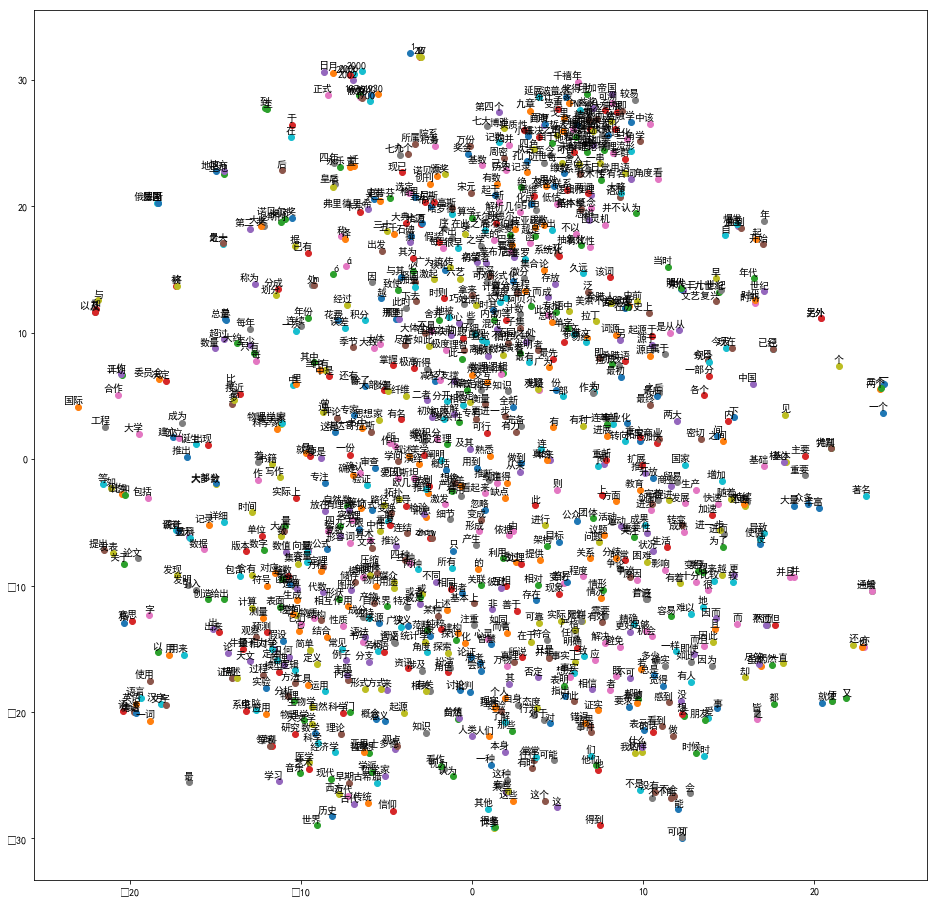

In [17]:
tsne_plot(model)